<h1><font color=red><center>ETUDE DU MOUVEMENT D'UNE BALLE DE GOLF<br>AVEC LE LANGAGE PYTHON</center></font></h1>

<div class = "alert alert-info">  
<b>Ce notebook reprend l'étude du mouvement de chute libre d'une balle de golf vue dans le TP N°4.</b>  
  
Tous les résultats ont déjà été obtenus mais nous allons ici voir comment on peut les obtenir avec un langage de programmation ce qui nous obligeara à comprendre un peu plus finement comment les calculs de vitesse et d'accélération peuvent être effectués.  
<img src="TPP4_chrono_Golf_verticale.jpg" alt="Balle de golf"></div>

<div class = "alert alert-warning">  

**Partie 1 : Récupération des données :**  

Avant de les traiter, il faut bien sûr avoir récupéré les données en effectuant un pointage de la vidéo (ou d'une chronophotographie).  
Soit vous disposez déjà d'un fichier comportant les données, soit vous les exportez depuis Regressi.  
Pour cela `Fichier` puis `Enregistrez sous`. Choisssez un nom pour votre fichier (par exemple *golf*) et le format **csv** à la place de rw3 puis `Enregistrer`. Cochez les grandeurs à exporter, ici t, x et y.  
Si vous ouvrez votre fichier, il doit ressemble à cela :
<img src="TPP4_imgcsv.jpg" alt="fichier csv">
</div>

In [16]:
# Phase d'initialisation

#importation des modules
import numpy as np
import matplotlib.pylab as plt
import csv
import sys

# Création des tableaux de données (vides pour l'instant)
donnees = []
temps = []
x = []
y = []

# Récupération des données du fichier
with open('golf.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';', quotechar='|')
    for row in spamreader:
        donnees.append(row)

# Nombre de points enregistrés lors du pointage
N = len(donnees)-2
nbGrandeurs = len(donnees[0])
# durée entre deux points en s
dt = (float(donnees[5][0].replace(',','.'))-float(donnees[2][0].replace(',','.')))/3      

#Initialisation des vitesses
vy =np.zeros(N)       #vitesse calculée selon l'axe des ordonnées

#Initialisation des accélérations
ay =np.zeros(N)       #accélération calculée selon l'axe des ordonnées

#Vérification de la structure de ce tableau (3 colonnes ont été exportées : temps, X et Y)
if nbGrandeurs != 3 :
    print("Problème dans la réalisation de votre pointage.\nReprenez le travail et exportez uniquement deux courbes (Mouvement_X et Mouvement_Y)")
    sys.exit()

#importation des coordonnées X, Y et temps
for i in range(2,len(donnees)):
    #Génération des listes, avec transformation des données
    temps.append(float(donnees[i][0].replace(',','.')))
    x.append(float(donnees[i][1].replace(',','.')))
    y.append(float(donnees[i][2].replace(',','.')))

In [17]:
# Vous pouvez exécuter cette cellule pour vérifier que les données ont bien été importées.
print(temps)
print(y)

[0.0, 0.033, 0.067, 0.1, 0.133, 0.167, 0.2, 0.233, 0.267, 0.3, 0.333, 0.367, 0.4, 0.433, 0.467, 0.5, 0.533, 0.567]
[1.91, 1.9, 1.87, 1.83, 1.78, 1.72, 1.66, 1.57, 1.47, 1.37, 1.26, 1.13, 0.986, 0.837, 0.674, 0.506, 0.323, 0.133]


<div class = "alert alert-warning">  

**Partie 2 : Affichage de la trajectoire :**  

Tout est déjà prêt ! Exécutez la cellule ci-dessous.  
Pour vérifiez si vous avez compris, affichez le graphe représentant l'altitude au cours du temps dans la cellule suivante avec un copier coller et un peu d'adaptation.
</div>

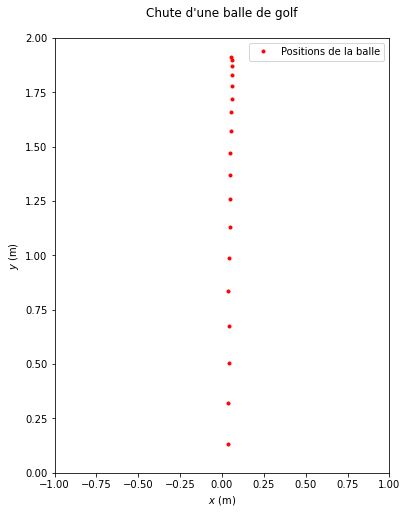

In [18]:
#Affichage de la fenêtre graphique

# On fixe une taille d'affichage et une zone de tracé
plt.figure(1, figsize=(6, 8))
plt.xlim(-1, +1)
plt.ylim(0,2)

#tracer les positions
plt.plot(x,y,"r.",label="Positions de la balle")
plt.legend(loc='upper right')

#étiquettes des axes
plt.xlabel(r'$ x $'+' (m)')
plt.ylabel(r'$ y $'+' (m)')

#Titre du graphique
plt.title("Chute d'une balle de golf\n",loc='center')

#Tracé du graphique
plt.show()

In [4]:
#Ici c'est pour afficher l'altitude au cours du temps.

<div class = "alert alert-warning">  

**Partie 3 : Calcul et affichage du vecteur vitesse :**  

Là aussi tout est déjà prêt :  
    - Expliquez la ligne 3,  
    - Pourquoi a-t-on besoin d'ajouter la ligne 5 ?,  
    - A quelle ligne utilise-t-on la fonction permettant de tracer le vecteur vitesse ?  
    - Modifiez certains paramètres de la fonction et observez les effets.

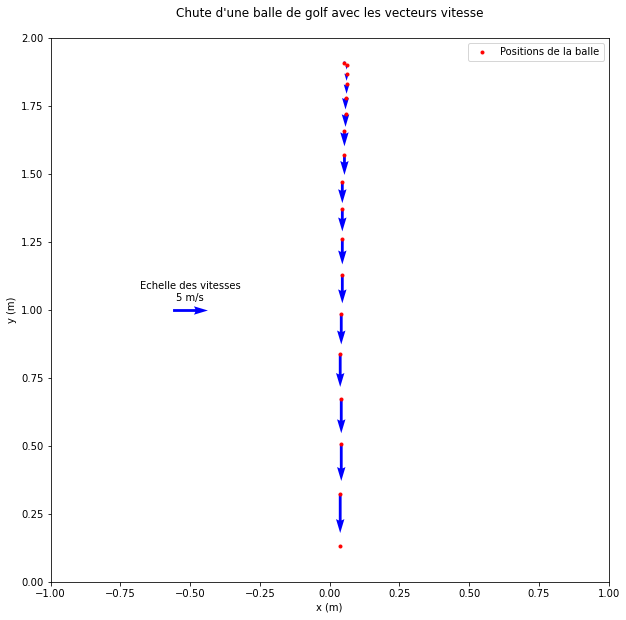

In [19]:
#Calculs approchés des coordonnées des vitesses
for i in range(1,N-1):
    vy[i] = (y[i+1]-y[i-1])/(2*dt)
# On ajoute l'absence de valeur de vitesse pour la dernière position
vy[N-1]=None

#Création d'une fonction permettant de tracer les vecteurs
# Les différents paramètres représentent :
# -L'origine du vecteur vitesse pour les deux premiers,
# -Les coordonnées du vecteur vitesse pour les deux suivants
# -Nature du vecteur (ici la vitesse)
# -Couleur choisie pour ce vecteur
# -Taille du vecteur(None=échelle automatique, plus l'échelle est grande, plus les vecteurs sont petits...)

def trace_vect(x,y,Vectx,Vecty,titre,couleur,echelle):
    q = plt.quiver(x,y,Vectx,Vecty,color = couleur,scale=echelle, width=0.005)
    plt.quiverkey(q, X=0.25, Y=0.5, U=5,label=titre, labelpos='N', color=couleur)    

#Mise à jour de l'affichage de la fenêtre graphique

plt.figure(1, figsize=(10, 10)) 
plt.xlim(-1, +1)
plt.ylim(0,2)
#tracer les positions
plt.plot(x,y,"r.",label="Positions de la balle")
#tracer les vecteurs vitesses calculées
trace_vect(x,y,0,vy,"Echelle des vitesses\n5 m/s",'b',80)    
plt.legend(loc='upper right')

#étiquettes des axes
plt.xlabel('x (m)')
plt.ylabel('y (m)')

#Titre du graphique
plt.title("Chute d'une balle de golf avec les vecteurs vitesse\n",loc='center')
plt.show()


<div class = "alert alert-warning">  

**Partie 4 : Calcul et affichage de l'accélération :**  

Modifiez le programme aux lignes indiquées afin de calculer les coordonnées des vecteurs accélérations puis ajoutez les sur le tracé.  
On peut envisager d'effacer les lignes 13 (12 ?) 33, 41.
</div>

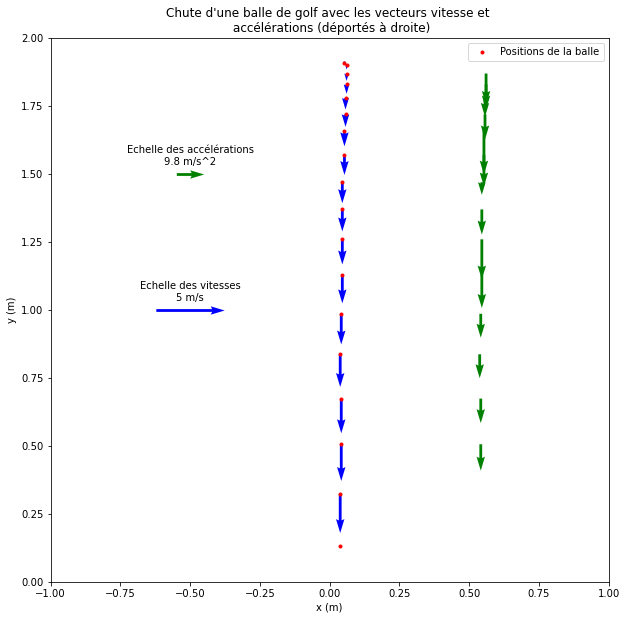

In [20]:
#Calculs approchés des coordonnées des vitesses
for i in range(1,N-1):
    vy[i] = (y[i+1]-y[i-1])/(2*dt)
# On ajoute l'absence de valeur de vitesse pour la dernière position
vy[N-1]=None

def trace_vect(x,y,Vectx,Vecty,titre,couleur,echelle):
    q = plt.quiver(x,y,Vectx,Vecty,color = couleur,scale=echelle, width=0.005)
    plt.quiverkey(q, X=0.25, Y=0.5, U=5,label=titre, labelpos='N', color=couleur)  

#Calculs approchés des coordonnées des accélérations
for i in range(2,N-2):
    ay[i] = (vy[i+1]-vy[i-1])/(2*dt)
# On ajoute l'absence de valeur d'accélération pour les premières et dernières positions
for indice in [0,1,N-2,N-1]:
    ay[indice]=None

def trace_vect(x,y,Vectx,Vecty,titre,couleur,echelle,poslegende):
    q = plt.quiver(x,y,Vectx,Vecty,color = couleur,scale=echelle, width=0.005)
    plt.quiverkey(q, X=0.25, Y=poslegende, U=9.8,label=titre, labelpos='N', color=couleur)  

#Mise à jour de l'affichage de la fenêtre graphique

plt.figure(1, figsize=(10, 10)) 
plt.xlim(-1, +1)
plt.ylim(0,2)
#tracer les positions
plt.plot(x,y,"r.",label="Positions de la balle")
#tracer les vecteurs vitesses calculées
trace_vect(x,y,0,vy,"Echelle des vitesses\n5 m/s",'b',80,0.5)    
plt.legend(loc='upper right')
#tracer les vecteurs vitesses calculées
trace_vect([x1+0.5 for x1 in x],y,0,ay,"Echelle des accélérations\n9.8 m/s^2",'g',200,0.75)    
plt.legend(loc='upper right')

#étiquettes des axes
plt.xlabel('x (m)')
plt.ylabel('y (m)')

#Titre du graphique
plt.title("Chute d'une balle de golf avec les vecteurs vitesse et \n accélérations (déportés à droite)",loc='center')
plt.show()
